In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
doctors_data = pd.read_csv('doctors.csv')
patients_data = pd.read_csv('patients.csv')
orders_data = pd.read_csv('orders.csv')
prescriptions_data = pd.read_csv('prescriptions.csv')
states = pd.read_excel('State Code.xlsx')

In [3]:
# Copy of data
doctors = doctors_data.copy()
patients = patients_data.copy()
orders = orders_data.copy()
prescriptions = prescriptions_data.copy()

# Doctors

In [4]:
# Understand the data
print(doctors.shape)

# Data types and missing values 
print(doctors.dtypes)
print(doctors.isnull().sum())

(2365, 4)
DOCTOR_ID    object
STATE        object
SPECIALTY    object
NAME         object
dtype: object
DOCTOR_ID     0
STATE         0
SPECIALTY    25
NAME          0
dtype: int64


In [5]:
doctors = doctors.dropna(subset=['SPECIALTY'])

In [6]:
# Doctors Data
print(doctors.shape)

(2340, 4)


In [7]:
# Find duplicate values in the 'DOCTOR_ID' column
duplicates = doctors[doctors['DOCTOR_ID'].duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [DOCTOR_ID, STATE, SPECIALTY, NAME]
Index: []


In [8]:
# Unique Values in Speciality
unique_spec = pd.Series(doctors['SPECIALTY'].unique())
sorted_unique_spec = unique_spec.sort_values(ascending=True).reset_index(drop=True)

# Print the sorted unique values
print(sorted_unique_spec)

0                                  Allergy & Immunology
1                                        Anesthesiology
2              Clinical Nurse Specialist, Family Health
3                                           DERMATOLOGY
4                                                  Derm
5                                           Dermatology
6                 Dermatology MOHS-Micrographic Surgery
7                    Dermatology Procedural Dermatology
8     Dermatology, Clinical & Laboratory Dermatologi...
9                         Dermatology, Dermatopathology
10               Dermatology, MOHS-Micrographic Surgery
11                   Dermatology, Pediatric Dermatology
12                  Dermatology, Procedural Dermatology
13                                   Emergency Medicine
14                                      Family Medicine
15                      Family Medicine, Adult Medicine
16                                    Internal Medicine
17             Internal Medicine, Hematology & O

In [9]:
# Clean Doctors - Speciality Column
# Replace 'Derm' with 'Dermatology', 'DERMATOLOGY' to 'Dermatology'
doctors['SPECIALTY'] = doctors['SPECIALTY'].str.replace(r'\bDerm\b', 'Dermatology', case=False, regex=True)
doctors['SPECIALTY'] = doctors['SPECIALTY'].str.replace(r'\bDERMATOLOGY\b', 'Dermatology', regex=True)

# Add a comma after 'Dermatology' if followed by another word and no comma exists
doctors['SPECIALTY'] = doctors['SPECIALTY'].str.replace(r'\b(Dermatology)(?!,)(\s\w)', r'\1,\2', regex=True)

# Similarly for 'Nurse Practitioner'
doctors['SPECIALTY'] = doctors['SPECIALTY'].str.replace(r'\b(Nurse Practitioner)(?!,)(\s\w)', r'\1,\2', regex=True)

# Similarly for 'Physician Assistant'
doctors['SPECIALTY'] = doctors['SPECIALTY'].str.replace(r'\b(Physician Assistant)(?!,)(\s\w)', r'\1,\2', regex=True)


In [10]:
# Unique Values in Speciality
unique_spec_1 = pd.Series(doctors['SPECIALTY'].unique())
sorted_unique_spec_1 = unique_spec_1.sort_values(ascending=True).reset_index(drop=True)

# Print the sorted unique values
#print(sorted_unique_spec_1)

In [11]:
# Splitting the specialties into two columns
split_speciality = [line.split(", ") if ", " in line else [line, ""] for line in doctors['SPECIALTY']]

# Convert to DataFrame
split_speciality_df = pd.DataFrame(split_speciality, columns=["Primary_Speciality", "Sub_Speciality"])

# Combine the new DataFrame with the original DataFrame
doctors = pd.concat([doctors.reset_index(drop=True), split_speciality_df], axis=1)
print(doctors.head())   

                  DOCTOR_ID STATE    SPECIALTY              NAME  \
0  66071f4f58fe938fe8664e72    TX  Dermatology     Doctor Kanita   
1  5de95803e4da290001799f31    NC  Dermatology     Doctor Jeania   
2  63ed08544765a5b0f7484f28    IA  Dermatology    Doctor Jelissa   
3  6620572517788cba6d2df4e1    TX   Specialist  Doctor Chaquitta   
4  66301146d50875fd2468580d    DC  Dermatology    Doctor Cherity   

  Primary_Speciality Sub_Speciality  
0        Dermatology                 
1        Dermatology                 
2        Dermatology                 
3         Specialist                 
4        Dermatology                 


In [12]:
# Combine Doctors with States in State_Code
doctors = pd.merge(doctors, states, left_on='STATE', right_on='STATE_CODE' , how='left')
doctors = doctors.drop(columns=['STATE'])

In [13]:
# Doctors Data
print(doctors)

                     DOCTOR_ID                     SPECIALTY  \
0     66071f4f58fe938fe8664e72                   Dermatology   
1     5de95803e4da290001799f31                   Dermatology   
2     63ed08544765a5b0f7484f28                   Dermatology   
3     6620572517788cba6d2df4e1                    Specialist   
4     66301146d50875fd2468580d                   Dermatology   
...                        ...                           ...   
2335  667c870b58dd1586be00e66a                   Dermatology   
2336  667dcc55bc88eda7ae49de8c  Physician Assistant, Medical   
2337  669955b5291eb227ef45a4d8  Physician Assistant, Medical   
2338  5b2a8ceee935f000a99e59e3                   Dermatology   
2339  63939a91485733fab8097918    Nurse Practitioner, Family   

                  NAME   Primary_Speciality Sub_Speciality  \
0        Doctor Kanita          Dermatology                  
1        Doctor Jeania          Dermatology                  
2       Doctor Jelissa          Dermatology  

In [14]:
# Check for duplicates
check_duplicates_doctors = doctors[doctors.duplicated()]
print(check_duplicates_doctors)

Empty DataFrame
Columns: [DOCTOR_ID, SPECIALTY, NAME, Primary_Speciality, Sub_Speciality, STATE_NAME, STATE_CODE, GEOGRAPHICAL_REGIONS]
Index: []


In [15]:
print(doctors.describe())

                       DOCTOR_ID    SPECIALTY             NAME  \
count                       2340         2340             2340   
unique                      2340           39              415   
top     66071f4f58fe938fe8664e72  Dermatology  Doctor Jerrilyn   
freq                           1         1168               14   

       Primary_Speciality Sub_Speciality STATE_NAME STATE_CODE  \
count                2340           2340       2339       2339   
unique                 19             23         48         48   
top           Dermatology                   Florida         FL   
freq                 1234           1890        264        264   

       GEOGRAPHICAL_REGIONS  
count                  2339  
unique                    9  
top               Southeast  
freq                    600  


In [16]:
speciality_counts = doctors['SPECIALTY'].value_counts()
print(speciality_counts)

SPECIALTY
Dermatology                                                       1168
Physician Assistant                                                534
Physician Assistant, Medical                                       171
Nurse Practitioner, Family                                         164
Nurse Practitioner                                                  64
Specialist                                                          49
Student in an Organized Health Care Education/Training Program      30
Dermatology, Procedural Dermatology                                 23
Dermatology, MOHS-Micrographic Surgery                              23
Family Medicine                                                     19
Physician Assistant, Surgical                                       15
Nurse Practitioner, Adult Health                                    12
Dermatology, Dermatopathology                                       11
Dermatology, Pediatric Dermatology                                 

# Patients

In [17]:
# Understand the data
print(patients.shape)

# Data types and missing values 
print(patients.dtypes)
print(patients.isnull().sum())

(8401, 2)
PATIENT_ID       object
DATE_OF_BIRTH    object
dtype: object
PATIENT_ID       0
DATE_OF_BIRTH    0
dtype: int64


In [18]:
# Patients Data
print(patients.head())

                 PATIENT_ID              DATE_OF_BIRTH
0  66071f4f58fe938fe8664e77  2006-09-01 07:00:00.000 Z
1  6672f605d8530844ea1de36b  2000-09-12 07:00:00.000 Z
2  660333c3ff0fafacca86fd99  1987-09-05 04:00:00.000 Z
3  661e83d9ba12b268aaab965a  1996-05-08 07:00:00.000 Z
4  6621b5ac7d64852edc6f66da  2009-09-11 08:00:00.000 Z


In [19]:
# Find duplicate values in the 'PATIENT_ID' column
duplicates_patients = patients[patients['PATIENT_ID'].duplicated(keep=False)]
print(duplicates_patients)

Empty DataFrame
Columns: [PATIENT_ID, DATE_OF_BIRTH]
Index: []


In [20]:
# Check for duplicates
check_duplicates_patients = patients[patients.duplicated()]
print(check_duplicates_patients)

Empty DataFrame
Columns: [PATIENT_ID, DATE_OF_BIRTH]
Index: []


In [21]:
# Remove the timezone indicator ' Z'
patients['DATE_OF_BIRTH'] = patients['DATE_OF_BIRTH'].str.replace(' Z', '')

# Convert to datetime without timezone information
patients['DATE_OF_BIRTH'] = pd.to_datetime(patients['DATE_OF_BIRTH'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
print(patients)

                    PATIENT_ID       DATE_OF_BIRTH
0     66071f4f58fe938fe8664e77 2006-09-01 07:00:00
1     6672f605d8530844ea1de36b 2000-09-12 07:00:00
2     660333c3ff0fafacca86fd99 1987-09-05 04:00:00
3     661e83d9ba12b268aaab965a 1996-05-08 07:00:00
4     6621b5ac7d64852edc6f66da 2009-09-11 08:00:00
...                        ...                 ...
8396  668bfcc0a75633d06ff22454 1976-07-31 07:00:00
8397  665767ea44f420234535ae56 1998-02-20 05:00:00
8398  6660a8bba4ef24bb840859b0 2007-12-19 05:00:00
8399  6660741c59fda04e6d5b2ba9 2004-02-17 05:00:00
8400  668c1250a75633d06ff2aa8b 2002-10-26 04:00:00

[8401 rows x 2 columns]


#### Age Calculation

In [22]:
# Define the reference date
reference_date = pd.to_datetime('2024-08-05')

# Calculate the age as of the reference date
patients["AGE"] = ((reference_date - patients["DATE_OF_BIRTH"]).dt.days)/ 365.25

# Round the age to two decimal points
patients["AGE"] = patients["AGE"].round()

print(patients)

                    PATIENT_ID       DATE_OF_BIRTH   AGE
0     66071f4f58fe938fe8664e77 2006-09-01 07:00:00  18.0
1     6672f605d8530844ea1de36b 2000-09-12 07:00:00  24.0
2     660333c3ff0fafacca86fd99 1987-09-05 04:00:00  37.0
3     661e83d9ba12b268aaab965a 1996-05-08 07:00:00  28.0
4     6621b5ac7d64852edc6f66da 2009-09-11 08:00:00  15.0
...                        ...                 ...   ...
8396  668bfcc0a75633d06ff22454 1976-07-31 07:00:00  48.0
8397  665767ea44f420234535ae56 1998-02-20 05:00:00  26.0
8398  6660a8bba4ef24bb840859b0 2007-12-19 05:00:00  17.0
8399  6660741c59fda04e6d5b2ba9 2004-02-17 05:00:00  20.0
8400  668c1250a75633d06ff2aa8b 2002-10-26 04:00:00  22.0

[8401 rows x 3 columns]


In [23]:
# Function to determine age group
def age_bracket(age):
    if age <= 1:
        return 'Infant (0-1 years)'
    elif 1 < age <= 3:
        return 'Toddler (1-3 years)'
    elif 3 < age <= 5:
        return 'Preschooler (3-5 years)'
    elif 5 < age <= 8:
        return 'Early Elementary (6-8 years)'
    elif 8 < age <= 11:
        return 'Late Elementary (9-11 years)'
    elif 11 < age <= 17:
        return 'Teenager (12-17 years)'
    elif 17 < age <= 24:
        return 'Young Adult (18-24 years)'
    elif 24 < age <= 34:
        return 'Early Adulthood (25-34 years)'
    elif 34 < age <= 49:
        return 'Mid Adulthood (35-49 years)'
    elif 49 < age <= 64:
        return 'Late Adulthood (50-64 years)'
    else:
        return 'Senior (65+ years)'

# Apply function to create Age Bracket column
patients['Age_Group'] = patients['AGE'].apply(age_bracket)

print(patients)


                    PATIENT_ID       DATE_OF_BIRTH   AGE  \
0     66071f4f58fe938fe8664e77 2006-09-01 07:00:00  18.0   
1     6672f605d8530844ea1de36b 2000-09-12 07:00:00  24.0   
2     660333c3ff0fafacca86fd99 1987-09-05 04:00:00  37.0   
3     661e83d9ba12b268aaab965a 1996-05-08 07:00:00  28.0   
4     6621b5ac7d64852edc6f66da 2009-09-11 08:00:00  15.0   
...                        ...                 ...   ...   
8396  668bfcc0a75633d06ff22454 1976-07-31 07:00:00  48.0   
8397  665767ea44f420234535ae56 1998-02-20 05:00:00  26.0   
8398  6660a8bba4ef24bb840859b0 2007-12-19 05:00:00  17.0   
8399  6660741c59fda04e6d5b2ba9 2004-02-17 05:00:00  20.0   
8400  668c1250a75633d06ff2aa8b 2002-10-26 04:00:00  22.0   

                          Age_Group  
0         Young Adult (18-24 years)  
1         Young Adult (18-24 years)  
2       Mid Adulthood (35-49 years)  
3     Early Adulthood (25-34 years)  
4            Teenager (12-17 years)  
...                             ...  
8396    Mid A

# Prescription

In [24]:
# Understand the data
print(prescriptions.shape)

# Data types and missing values 
print(prescriptions.dtypes)
print(prescriptions.isnull().sum())

(9208, 4)
PRESCRIPTION_ID            object
PATIENT_ID                 object
DOCTOR_ID                  object
PRESCRIPTION_WRITTEN_AT    object
dtype: object
PRESCRIPTION_ID            0
PATIENT_ID                 0
DOCTOR_ID                  0
PRESCRIPTION_WRITTEN_AT    0
dtype: int64


In [25]:
# Check for duplicates
check_duplicates_prescriptions = prescriptions[prescriptions.duplicated()]
print(check_duplicates_prescriptions)

Empty DataFrame
Columns: [PRESCRIPTION_ID, PATIENT_ID, DOCTOR_ID, PRESCRIPTION_WRITTEN_AT]
Index: []


In [26]:
# Prescriptions Data
print(prescriptions.head())

            PRESCRIPTION_ID                PATIENT_ID  \
0  6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92ed   
1  664cde23600e7e3f254eebdb  664cde23600e7e3f254eebd6   
2  6655fc2edb2d27ccb657f4ee  664cde23600e7e3f254eebd6   
3  667af276b220091a8df2cf80  667af276b220091a8df2cf7c   
4  65272a2a8fcaa8936d7ec02e  65272a2a8fcaa8936d7ec02a   

                  DOCTOR_ID    PRESCRIPTION_WRITTEN_AT  
0  6614201bb3fe6df48d3e92e8  2024-04-05 16:00:00.000 Z  
1  5d4c36f60f567e0001349e45  2024-05-21 16:00:00.000 Z  
2  5d4c36f60f567e0001349e45  2024-05-27 16:00:00.000 Z  
3  667af276b220091a8df2cf77  2024-06-24 16:00:00.000 Z  
4  64919e368eacb3e62521fc66  2024-04-08 16:00:00.000 Z  


In [27]:
# Remove the timezone indicator ' Z'
prescriptions['PRESCRIPTION_WRITTEN_AT'] = prescriptions['PRESCRIPTION_WRITTEN_AT'].str.replace(' Z', '')

# Convert to datetime without timezone information
prescriptions['PRESCRIPTION_WRITTEN_AT'] = pd.to_datetime(prescriptions['PRESCRIPTION_WRITTEN_AT'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Filter out prescriptions written before January 1, 2024
filtered_prescriptions = prescriptions[prescriptions['PRESCRIPTION_WRITTEN_AT'] >= '2024-01-01']
filtered_prescriptions_before_2024 = prescriptions[prescriptions['PRESCRIPTION_WRITTEN_AT'] < '2024-01-01']

print(filtered_prescriptions.shape)
print(filtered_prescriptions_before_2024.shape)

(8778, 4)
(429, 4)


# Orders

In [28]:
# Understand the data
print(orders.shape)

# Data types and missing values 
print(orders.dtypes)
print(orders.isnull().sum())

(12633, 6)
ORDER_ID               object
PRESCRIPTION_ID        object
INSURANCE_COVERAGE     object
DAYS_OF_SUPPLY        float64
CREATED_AT             object
SHIPPED_AT             object
dtype: object
ORDER_ID                 0
PRESCRIPTION_ID          0
INSURANCE_COVERAGE    2555
DAYS_OF_SUPPLY          19
CREATED_AT               0
SHIPPED_AT            5261
dtype: int64


In [29]:
orders = orders.dropna(subset=['DAYS_OF_SUPPLY'])

In [30]:
# Orders Data
print(orders.head())

                   ORDER_ID           PRESCRIPTION_ID INSURANCE_COVERAGE  \
0  66071f4f58fe938fe8664e7c  66071f4f58fe938fe8664e7b         notCovered   
1  66982e8e2fcd3bdb965f0e66  66982e8e2fcd3bdb965f0e65         notCovered   
2  6672f606d8530844ea1de370  6672f606d8530844ea1de36f         notCovered   
3  660333c4ff0fafacca86fdb0  660333c4ff0fafacca86fdaf         notCovered   
4  6647057faf80dec36e54b16f  661e83d9ba12b268aaab965e         notCovered   

   DAYS_OF_SUPPLY                 CREATED_AT                 SHIPPED_AT  
0            30.0  2024-03-29 20:06:39.983 Z                        NaN  
1            30.0  2024-07-17 20:50:22.973 Z                        NaN  
2            30.0  2024-06-19 15:15:18.009 Z  2024-07-23 18:40:46.900 Z  
3            30.0  2024-03-26 20:44:52.492 Z                        NaN  
4            30.0  2024-05-17 07:21:35.910 Z  2024-05-21 18:59:59.728 Z  


In [31]:
# Check for duplicates
check_duplicates_orders = orders[orders.duplicated()]
print(check_duplicates_orders)

Empty DataFrame
Columns: [ORDER_ID, PRESCRIPTION_ID, INSURANCE_COVERAGE, DAYS_OF_SUPPLY, CREATED_AT, SHIPPED_AT]
Index: []


In [32]:
# Identify rows with missing values in 'INSURANCE_COVERAGE'
print(orders[orders['INSURANCE_COVERAGE'].isna()])

                       ORDER_ID           PRESCRIPTION_ID INSURANCE_COVERAGE  \
17     666a3a6a98b448fdc5411981  666a3a6a98b448fdc5411980                NaN   
24     66a7be4318ebca2e879cfed0  66a7be4318ebca2e879cfecf                NaN   
32     66588d5386e94bd4c50bc721  66588d5386e94bd4c50bc720                NaN   
34     6693d7fd6438dbbbe92bffec  6693d7fd6438dbbbe92bffeb                NaN   
43     660b35391202af7e1eb16908  660b35391202af7e1eb16907                NaN   
...                         ...                       ...                ...   
12621  661ea52a8ef6a2c44298d341  661ea52a8ef6a2c44298d340                NaN   
12624  65c40ec5aaa2109f04513972  65c40ec5aaa2109f04513971                NaN   
12627  668439b304605bb8409bc677  668439b304605bb8409bc676                NaN   
12628  668bfcc1a75633d06ff22459  668bfcc1a75633d06ff22458                NaN   
12632  668c1251a75633d06ff2aa91  668c1251a75633d06ff2aa90                NaN   

       DAYS_OF_SUPPLY                 C

In [33]:
# Replace missing values in 'INSURANCE_COVERAGE' with 'No insurance'
orders['INSURANCE_COVERAGE'] = orders['INSURANCE_COVERAGE'].fillna('No_insurance')

In [34]:
# Identify rows with missing values in 'SHIPPED_AT'
missing_shipped_at = orders[orders['SHIPPED_AT'].isna()]
print(missing_shipped_at.shape)

(5242, 6)


In [35]:
# Remove the timezone indicator ' Z'
orders['CREATED_AT'] = orders['CREATED_AT'].str.replace(' Z', '')
orders['SHIPPED_AT'] = orders['SHIPPED_AT'].str.replace(' Z', '')

# Convert to datetime without timezone information
orders['CREATED_AT'] = pd.to_datetime(orders['CREATED_AT'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')
orders['SHIPPED_AT'] = pd.to_datetime(orders['SHIPPED_AT'], format='%Y-%m-%d %H:%M:%S.%f', errors='coerce')

# Filter out prescriptions written before January 1, 2024
filtered_orders = orders[orders['CREATED_AT'] >= '2024-01-01']

print(filtered_orders.shape)
print(filtered_orders.head())

(12614, 6)
                   ORDER_ID           PRESCRIPTION_ID INSURANCE_COVERAGE  \
0  66071f4f58fe938fe8664e7c  66071f4f58fe938fe8664e7b         notCovered   
1  66982e8e2fcd3bdb965f0e66  66982e8e2fcd3bdb965f0e65         notCovered   
2  6672f606d8530844ea1de370  6672f606d8530844ea1de36f         notCovered   
3  660333c4ff0fafacca86fdb0  660333c4ff0fafacca86fdaf         notCovered   
4  6647057faf80dec36e54b16f  661e83d9ba12b268aaab965e         notCovered   

   DAYS_OF_SUPPLY              CREATED_AT              SHIPPED_AT  
0            30.0 2024-03-29 20:06:39.983                     NaT  
1            30.0 2024-07-17 20:50:22.973                     NaT  
2            30.0 2024-06-19 15:15:18.009 2024-07-23 18:40:46.900  
3            30.0 2024-03-26 20:44:52.492                     NaT  
4            30.0 2024-05-17 07:21:35.910 2024-05-21 18:59:59.728  


In [36]:
# Count the occurrences of each DAYS_OF_SUPPLY value
days_of_supply_counts = filtered_orders['DAYS_OF_SUPPLY'].value_counts()

# Filter to keep only those DAYS_OF_SUPPLY values where the count is 10 or more
values_to_keep = days_of_supply_counts[days_of_supply_counts >= 10].index

# Apply the filter to the original dataframe
filtered_orders = filtered_orders[filtered_orders['DAYS_OF_SUPPLY'].isin(values_to_keep)]

print(filtered_orders)

                       ORDER_ID           PRESCRIPTION_ID INSURANCE_COVERAGE  \
0      66071f4f58fe938fe8664e7c  66071f4f58fe938fe8664e7b         notCovered   
1      66982e8e2fcd3bdb965f0e66  66982e8e2fcd3bdb965f0e65         notCovered   
2      6672f606d8530844ea1de370  6672f606d8530844ea1de36f         notCovered   
3      660333c4ff0fafacca86fdb0  660333c4ff0fafacca86fdaf         notCovered   
4      6647057faf80dec36e54b16f  661e83d9ba12b268aaab965e         notCovered   
...                         ...                       ...                ...   
12628  668bfcc1a75633d06ff22459  668bfcc1a75633d06ff22458       No_insurance   
12629  665767eb44f420234535ae5c  665767eb44f420234535ae5b            covered   
12630  6660a8bca4ef24bb840859bd  6660a8bca4ef24bb840859bc         notCovered   
12631  6660741d59fda04e6d5b2baf  6660741d59fda04e6d5b2bae         notCovered   
12632  668c1251a75633d06ff2aa91  668c1251a75633d06ff2aa90       No_insurance   

       DAYS_OF_SUPPLY              CREA

In [37]:
insurance_coverage_counts = filtered_orders['INSURANCE_COVERAGE'].value_counts()
print(insurance_coverage_counts)

INSURANCE_COVERAGE
notCovered      6550
covered         3528
No_insurance    2527
Name: count, dtype: int64


In [38]:
# Combining filtered_prescriptions_before_2024 and orders to see how the data looks like
prescriptions_before_2024 = pd.merge(filtered_prescriptions_before_2024, filtered_orders, on='PRESCRIPTION_ID', how='inner')
print(prescriptions_before_2024)

              PRESCRIPTION_ID                PATIENT_ID  \
0    6626cd0f363c1a30fee91706  6626cd0f363c1a30fee91702   
1    6626cd0f363c1a30fee91706  6626cd0f363c1a30fee91702   
2    66746793cfd704da15225870  66746793cfd704da1522586d   
3    664f7db9dd81926ca4757ab1  664f7db9dd81926ca4757aae   
4    669aa49f3a18133d0e53b32b  669aa49e3a18133d0e53b327   
..                        ...                       ...   
577  665f7fce59fda04e6d59a993  665f7fce59fda04e6d59a990   
578  6602fe9dd5a1aa7cf0de5d0e  6602fe9dd5a1aa7cf0de5d0a   
579  6602fe9dd5a1aa7cf0de5d0e  6602fe9dd5a1aa7cf0de5d0a   
580  669ad2fa746d0fae558380e0  669ad2fa746d0fae558380dd   
581  6620589348b92f97a599a304  6620589348b92f97a599a300   

                    DOCTOR_ID PRESCRIPTION_WRITTEN_AT  \
0    6626cd0f363c1a30fee916fb     2023-06-01 16:00:00   
1    6626cd0f363c1a30fee916fb     2023-06-01 16:00:00   
2    5b294f0a7eea3100a900071f     2023-07-27 16:00:00   
3    64431296617ab44dc1e2899c     2023-08-10 16:00:00   
4    6

## Export for Tableau

In [39]:
doctors.to_csv('doctors_cleaned.csv', index=False)
patients.to_csv('patients_cleaned.csv', index=False)
filtered_orders.to_csv('orders_cleaned.csv', index=False)
filtered_prescriptions.to_csv('prescriptions_cleaned.csv', index=False)

# Analysis

### States in which our drugs are not prescribed

In [40]:
# Merge the doctors information with the prescriptions to find doctors who prescribed the drug
doctors_prescribed = doctors.merge(filtered_prescriptions, on='DOCTOR_ID')

# Extract the list of states where doctors have prescribed the drug
states_prescribed = set(doctors_prescribed['STATE_CODE'])

# Extract the list of all state codes
all_states = set(states['STATE_CODE'])

# Identify the states where no doctor has prescribed the drug
states_not_prescribed = all_states - states_prescribed

# Filter the states_df to get the names of states with codes in states_not_prescribed
states_not_prescribed_df = states[states['STATE_CODE'].isin(states_not_prescribed)]

# Get the list of state names
states_not_prescribed_names = states_not_prescribed_df['STATE_NAME'].tolist()

print("States where no doctor has prescribed the specific drug:", states_not_prescribed_names)

States where no doctor has prescribed the specific drug: ['Maine', 'Puerto Rico', 'Vermont', 'Wyoming']


### Count the number of times the prescription was used to fill an order


In [41]:
Orders_per_prescription = pd.merge(filtered_prescriptions, orders, on='PRESCRIPTION_ID', how='left')
#print(Orders_per_prescription.head())

# Group by 'PRESCRIPTION_ID' and count the number of unique 'ORDER_ID'
unique_orders_per_prescription = Orders_per_prescription.groupby(['DOCTOR_ID', 'PATIENT_ID','PRESCRIPTION_ID'])['ORDER_ID'].nunique().reset_index(name='Unique_Order_Count')

# Sort the DataFrame by 'Unique_Order_Count' in descending order
sorted_unique_orders_per_prescription = unique_orders_per_prescription.sort_values(by='Unique_Order_Count', ascending=False)

print(sorted_unique_orders_per_prescription)

# Get the distribution of Unique_Order_Count
distribution= sorted_unique_orders_per_prescription['Unique_Order_Count'].value_counts().sort_index()
print(distribution)

                     DOCTOR_ID                PATIENT_ID  \
871   5d236b5f12d2500001469cb1  6571dc08d81ce720849314d9   
2444  65171355ce175957c5f95308  65bd9cf67841af9c03fe9c8a   
2797  659be7a0280780e3d123fef4  659be7a1280780e3d123fefd   
2609  655383bc62d6ce51ca04b814  65e0d0647de15ee8b271eef6   
398   5b2a8cace935f000a99e59ac  65d8c60b56b6f1f2c884ab8b   
...                        ...                       ...   
112   5a7b2d554e9a9400b5055ed1  66abf1a3ea51f591c5ff7106   
1819  60e86f32f82c3c7b658a35d7  661985bba1c6459e94f1dd78   
1521  5e57f9db59dbb1000116a894  669a8c984dea968c3d800393   
1309  5dfd19885d0d290001501fdd  65f455a5d3bbc4f868a4baa0   
8654  66901f1b7d49714b690e76bf  66901f1b7d49714b690e76c8   

               PRESCRIPTION_ID  Unique_Order_Count  
871   6571dc08d81ce720849314df                   7  
2444  65bd9cf67841af9c03fe9c92                   7  
2797  659be7a1280780e3d123ff05                   7  
2609  65e0d0657de15ee8b271eefc                   6  
398   65d8c60b

### Unique Prescription for Grouped Doctor ID and Patient ID

In [42]:
# Group by 'DOCTOR_ID' and 'PATIENT_ID' and count the number of unique 'PRESCRIPTION_ID'
no_prescriptions_count = Orders_per_prescription.groupby(['DOCTOR_ID', 'PATIENT_ID'])['PRESCRIPTION_ID'].nunique()
No_of_refills = len(Orders_per_prescription) - len(no_prescriptions_count)
print(No_of_refills)

4001


### Patient Adherence

##### Event Based Patient Adherence

In [47]:
# Define the evaluation period
start_date = '2024-01-01'
end_date = '2024-08-05'

# Filter data within the evaluation period
evaluation_period_data = Orders_per_prescription[(Orders_per_prescription['PRESCRIPTION_WRITTEN_AT'] >= start_date) & (Orders_per_prescription['PRESCRIPTION_WRITTEN_AT'] <= end_date)]

# Drop rows with NaN values in DAYS_OF_SUPPLY
evaluation_period_data = evaluation_period_data.dropna(subset=['DAYS_OF_SUPPLY'])

# Calculate the number of days in the evaluation period
number_of_days = (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days
#print(number_of_days)

# Filter for only shipped orders
shipped_orders = Orders_per_prescription[Orders_per_prescription['SHIPPED_AT'].notna()]

#MPR
# Group by PATIENT_ID and get the total number of days of supply
total_days_supply_per_patient = shipped_orders.groupby('PATIENT_ID').agg(
    Total_Days_Of_Supply=('DAYS_OF_SUPPLY', 'sum')
).reset_index()

#PDC
# Filter for only shipped orders
shipped_orders = Orders_per_prescription[Orders_per_prescription['SHIPPED_AT'].notna()]

# Group by PATIENT_ID and get the first and last shipped date
grouped = shipped_orders.groupby('PATIENT_ID').agg(
    First_Shipped_At=('SHIPPED_AT', 'min'),
    Last_Shipped_At=('SHIPPED_AT', 'max')
).reset_index()

# Merge to get the DAYS_OF_SUPPLY for the last shipped date
merged = pd.merge(grouped, shipped_orders[['PATIENT_ID', 'SHIPPED_AT', 'DAYS_OF_SUPPLY']],
                  left_on=['PATIENT_ID', 'Last_Shipped_At'], right_on=['PATIENT_ID', 'SHIPPED_AT'],
                  how='left')

# Calculate the difference between the first and last shipped dates
merged['Difference_Days'] = (merged['Last_Shipped_At'] - merged['First_Shipped_At']).dt.days

# Add the DAYS_OF_SUPPLY from the last shipped date to the difference in days
merged['Total_Days'] = merged['Difference_Days'] + merged['DAYS_OF_SUPPLY']

# Select the relevant columns
result = merged[['PATIENT_ID', 'First_Shipped_At', 'Last_Shipped_At' , 'Total_Days']]

# Merge total_days_supply_per_patient and grouped DataFrames on Patient_ID
merged = pd.merge(total_days_supply_per_patient, result, on='PATIENT_ID')

# MPR Calculation
merged['MPR'] = (merged['Total_Days_Of_Supply'] / number_of_days)*100

# PDC Calculation
merged['PDC'] = (merged['Total_Days'] / number_of_days)*100

print(merged.head())
print(merged['MPR'].describe())
print(merged['PDC'].describe())


                 PATIENT_ID  Total_Days_Of_Supply        First_Shipped_At  \
0  5a83288837fb1000a85ab4fe                  90.0 2024-05-11 21:49:10.785   
1  5bce01cd0bd67300a91debc5                  60.0 2024-06-29 21:12:42.133   
2  5c0eb790fc03a200a9e4307c                  60.0 2024-04-16 18:06:17.144   
3  5caf5f2efa134900aa626501                  30.0 2024-05-21 16:53:19.094   
4  5cdab7cc16a28f00aae31d25                  60.0 2024-07-08 17:23:17.839   

          Last_Shipped_At  Total_Days        MPR         PDC  
0 2024-07-02 22:25:16.359        82.0  41.474654  109.756098  
1 2024-07-26 21:22:37.573        57.0  27.649770  105.263158  
2 2024-05-10 16:08:09.357        53.0  27.649770  113.207547  
3 2024-05-21 16:53:19.094        30.0  13.824885  100.000000  
4 2024-08-01 20:19:14.151        54.0  27.649770  111.111111  
count    4361.000000
mean       22.228868
std        12.410451
min        13.824885
25%        13.824885
50%        13.824885
75%        27.649770
max        9

In [46]:
merged.to_csv('merged.csv', index=False)

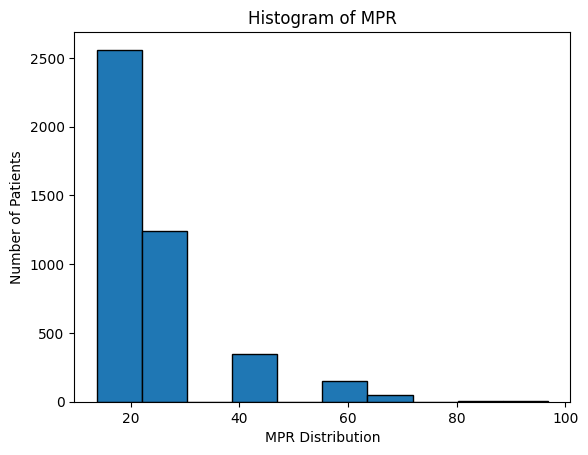

In [44]:
# Create a histogram
plt.hist(merged['MPR'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of MPR')
plt.xlabel('MPR Distribution')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()


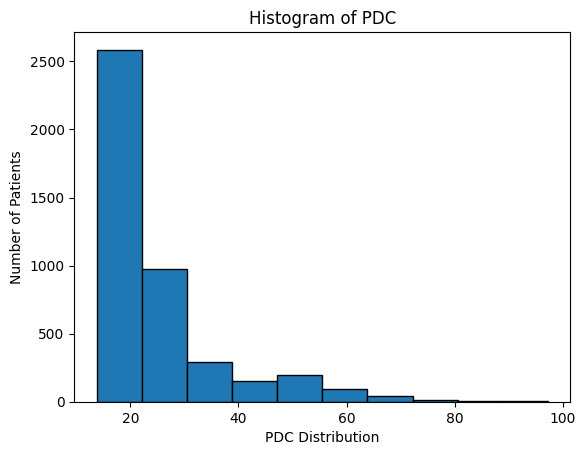

In [45]:
# Create a histogram
plt.hist(merged['PDC'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of PDC')
plt.xlabel('PDC Distribution')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()


##### Order Shipped to till date Adherence

In [214]:
# Filter for only shipped orders
shipped_orders = Orders_per_prescription[Orders_per_prescription['SHIPPED_AT'].notna()]
shipped_orders = shipped_orders[shipped_orders['DAYS_OF_SUPPLY'].notna()]

#MPR
# Group by PATIENT_ID and get the total number of days of supply
total_days_supply_per_patient = shipped_orders.groupby('PATIENT_ID').agg(
    Total_Days_Of_Supply=('DAYS_OF_SUPPLY', 'sum')
).reset_index()
#print(total_days_supply_per_patient.head())

#PDC
df = Orders_per_prescription.copy()
# Assuming you want to calculate PDC within a specific observation period
# For simplicity, let's assume the observation period is from the first created date to the last shipped date
start_date = df['CREATED_AT'].min()
end_date = df['SHIPPED_AT'].max()

# Function to calculate PDC for each patient
def calculate_pdc(df):
    
    # Define the observation period
    observation_period_start = df['SHIPPED_AT'].min()
    observation_period_end = df['SHIPPED_AT'].max()
    
    # Initialize dictionary to store coverage days for each patient
    patient_coverage = {}
    
    for patient_id, patient_df in df.groupby('PATIENT_ID'):
        covered_days = set()
        
        for _, row in patient_df.iterrows():
            # Determine the coverage start and end dates
            coverage_start = row['SHIPPED_AT']
            coverage_end = coverage_start + pd.Timedelta(days=row['DAYS_OF_SUPPLY'])
            
            # Ensure the coverage period is within the observation period
            coverage_start = max(coverage_start, observation_period_start)
            coverage_end = min(coverage_end, observation_period_end)
            
            # Add covered days to the set
            if coverage_start < coverage_end:
                covered_days.update(pd.date_range(start=coverage_start, end=coverage_end))
        
        # Calculate the number of covered days for this patient
        patient_coverage[patient_id] = len(covered_days)
    
    # Calculate the total number of days in the observation period
    total_days = (observation_period_end - observation_period_start).days + 1
    
    # Calculate PDC for each patient
    pdc = {patient_id: (coverage_days / total_days) * 100 for patient_id, coverage_days in patient_coverage.items()}
    
    return pdc

# Calculate PDC
pdc = calculate_pdc(df)
print(f"PDC for each patient: {pdc}")

ValueError: cannot convert float NaN to integer

In [213]:
## trial
import pandas as pd
import numpy as np

# # Sample DataFrame
# data = {
#     'PATIENT_ID': [1, 1, 1, 2, 2],
#     'SHIPPED_AT': ['2024-01-01', '2024-01-15', '2024-02-01', '2024-01-01', '2024-01-20'],
#     'DAYS_OF_SUPPLY': [30, 30, 30, 15, 30]
# }
# Orders_per_prescription = pd.DataFrame(data)
# Orders_per_prescription['SHIPPED_AT'] = pd.to_datetime(Orders_per_prescription['SHIPPED_AT'])

# Filter for only shipped orders
shipped_orders = Orders_per_prescription[Orders_per_prescription['SHIPPED_AT'].notna()]

# Define the evaluation period (today)
end_date = pd.to_datetime('2024-08-05')

# Sort orders by PATIENT_ID and SHIPPED_AT
shipped_orders = shipped_orders.sort_values(by=['PATIENT_ID', 'SHIPPED_AT'])

# Initialize list to store results
results = []

# Process each patient's orders
for patient_id, group in shipped_orders.groupby('PATIENT_ID'):
    # Initialize variables
    total_days_covered = 0
    
    # Iterate through each shipment and calculate coverage
    for i in range(len(group)):
        current_shipment = group.iloc[i]
        current_date = current_shipment['SHIPPED_AT']
        days_of_supply = current_shipment['DAYS_OF_SUPPLY']
        
        if i == len(group) - 1:
            # Last shipment to end_date
            next_date = end_date
        else:
            # Next shipment date
            next_shipment = group.iloc[i + 1]
            next_date = next_shipment['SHIPPED_AT']
        
        # Calculate the number of days between the current and next date
        days_between = (next_date - current_date).days
        
        # Calculate days covered in this interval
        days_covered = min(days_between, days_of_supply)
        
        # Add days covered to total
        total_days_covered += days_covered
        
    # Account for the last interval if necessary
    last_shipment_date = group.iloc[-1]['SHIPPED_AT']
    if last_shipment_date < end_date:
        days_of_supply_last = group.iloc[-1]['DAYS_OF_SUPPLY']
        days_covered_last = min((end_date - last_shipment_date).days, days_of_supply_last)
        total_days_covered += days_covered_last
    
    # Record results for the patient
    total_days_in_period = (end_date - group['SHIPPED_AT'].min()).days
    results.append({
        'PATIENT_ID': patient_id,
        'Total_Days_Covered': total_days_covered,
        'Total_Days_In_Period': total_days_in_period
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Calculate PDC
results_df['PDC'] = (results_df['Total_Days_Covered'] / results_df['Total_Days_In_Period']) * 100

# Print the results
print(results_df)


                    PATIENT_ID  Total_Days_Covered  Total_Days_In_Period  \
0     5a83288837fb1000a85ab4fe               111.0                    85   
1     5bce01cd0bd67300a91debc5                45.0                    36   
2     5c0eb790fc03a200a9e4307c                83.0                   110   
3     5caf5f2efa134900aa626501                60.0                    75   
4     5cdab7cc16a28f00aae31d25                30.0                    27   
...                        ...                 ...                   ...   
4356  66a93f52323ec984325e79a0                 6.0                     3   
4357  66a942c2323ec984325e8cf8                 6.0                     3   
4358  66a9557c702bba9f698d5cc8                 6.0                     3   
4359  66aa391be1d614705b85aba9                 6.0                     3   
4360  66aa519fae0f9c9dd8046cb9                 6.0                     3   

             PDC  
0     130.588235  
1     125.000000  
2      75.454545  
3      80.0

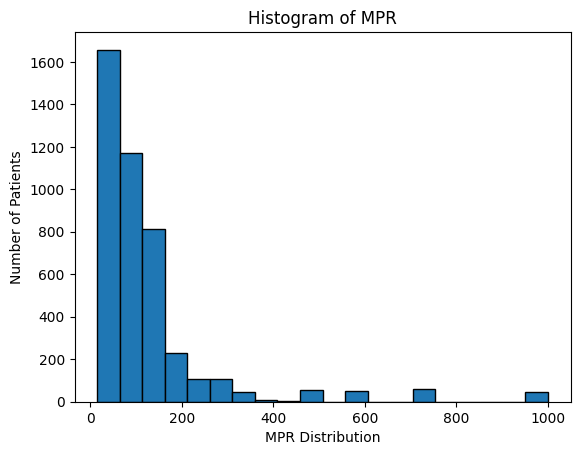

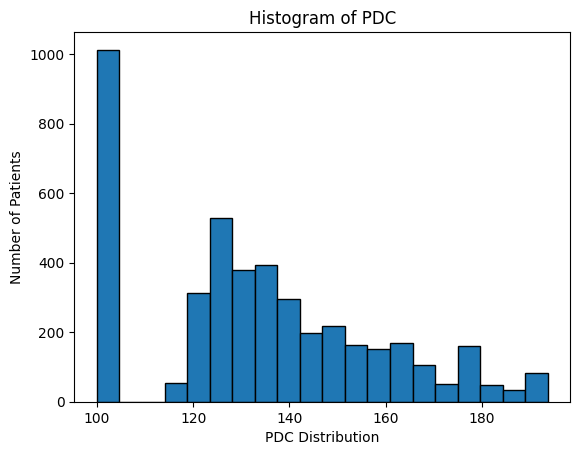

In [48]:
# Create a histogram
plt.hist(merged_data['MPR'], bins=20, edgecolor='black')

# Add titles and labels
plt.title('Histogram of MPR')
plt.xlabel('MPR Distribution')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

# Create a histogram
plt.hist(merged_data['PDC'], bins=20, edgecolor='black')

# Add titles and labels
plt.title('Histogram of PDC')
plt.xlabel('PDC Distribution')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()


### High Values of Shipped Orders Out of Created Orders

In [49]:
total_created_orders = Orders_per_prescription['ORDER_ID'].nunique()
total_shipped_orders = Orders_per_prescription[Orders_per_prescription['SHIPPED_AT'].notna()]['ORDER_ID'].nunique()
shipping_rate = (total_shipped_orders / total_created_orders)*100
print("Shipping Rate:",shipping_rate)

Shipping Rate: 58.14146787465714


### Order Covered by Insurance

In [50]:
total_covered_orders = Orders_per_prescription[Orders_per_prescription['INSURANCE_COVERAGE'].str.lower() == 'covered'].shape[0]
print(total_covered_orders)
insurance_coverage_rate = (total_covered_orders / total_created_orders)*100
print("Insurance Coverage Rate:", insurance_coverage_rate)


3412
Insurance Coverage Rate: 28.360069819632617


### Order Not Covered by Insurance

In [51]:
total_non_covered_orders = Orders_per_prescription[Orders_per_prescription['INSURANCE_COVERAGE'].str.lower() == 'notcovered'].shape[0]
print(total_non_covered_orders)
insurance_non_coverage_rate = (total_non_covered_orders / total_created_orders)*100
print("Insurance Non Coverage:", insurance_non_coverage_rate)

6193
Insurance Non Coverage: 51.47535533205885


### Order without Insurance

In [52]:
total_no_insurance_orders = Orders_per_prescription[Orders_per_prescription['INSURANCE_COVERAGE'].str.lower() == 'no_insurance'].shape[0]
print(total_no_insurance_orders)
no_insurance_rate = (total_no_insurance_orders / total_created_orders)*100
print("No Insurance Rate:", no_insurance_rate)

2426
No Insurance Rate: 20.164574848308536


### Order vs Insurance Coverage

In [53]:
# Ensure 'INSURANCE_COVERAGE' is in lowercase for consistency
Orders_per_prescription['INSURANCE_COVERAGE'] = Orders_per_prescription['INSURANCE_COVERAGE'].str.lower()

# Define shipped orders (assuming 'SHIPPED_AT' indicates the order is shipped)
Orders_per_prescription['Shipped'] = Orders_per_prescription['SHIPPED_AT'].notna()

# Calculate the total number of shipped orders in each insurance category
coverage_categories = ['covered', 'notcovered', 'no_insurance']

shipped_stats = {}
for category in coverage_categories:
    # Filter orders by insurance coverage
    category_orders = Orders_per_prescription[Orders_per_prescription['INSURANCE_COVERAGE'] == category]
    
    # Count the total number of orders and shipped orders
    total_orders = category_orders.shape[0]
    shipped_orders = category_orders['Shipped'].sum()
    
    # Calculate the proportion of shipped orders
    shipped_proportion = shipped_orders / total_orders if total_orders > 0 else 0
    
    # Store the results
    shipped_stats[category] = {
        'Total Orders': total_orders,
        'Shipped Orders': shipped_orders,
        'Shipped Proportion': shipped_proportion
    }

# Print results
for category, stats in shipped_stats.items():
    print(f"Insurance Coverage: {category}")
    print(f"  Total Orders: {stats['Total Orders']}")
    print(f"  Shipped Orders: {stats['Shipped Orders']}")
    print(f"  Shipped Proportion: {stats['Shipped Proportion']:.2%}")
    print()


Insurance Coverage: covered
  Total Orders: 3412
  Shipped Orders: 3057
  Shipped Proportion: 89.60%

Insurance Coverage: notcovered
  Total Orders: 6193
  Shipped Orders: 3914
  Shipped Proportion: 63.20%

Insurance Coverage: no_insurance
  Total Orders: 2426
  Shipped Orders: 24
  Shipped Proportion: 0.99%



### Average Refills

In [54]:
refills = Orders_per_prescription.groupby(['PATIENT_ID'])['PRESCRIPTION_ID'].count()
average_refills = refills.mean()
print("Average Refills:", average_refills)

Average Refills: 1.4987562189054726


### Age Based Analysis

In [55]:
age_prescriptions = pd.merge(Orders_per_prescription, patients, on='PATIENT_ID', how='inner')
print(age_prescriptions)

# Calculate the average age of patients who received prescriptions
average_age = age_prescriptions['AGE'].mean()
#print("Average Age:", average_age)

                PRESCRIPTION_ID                PATIENT_ID  \
0      6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92ed   
1      664cde23600e7e3f254eebdb  664cde23600e7e3f254eebd6   
2      6655fc2edb2d27ccb657f4ee  664cde23600e7e3f254eebd6   
3      667af276b220091a8df2cf80  667af276b220091a8df2cf7c   
4      65272a2a8fcaa8936d7ec02e  65272a2a8fcaa8936d7ec02a   
...                         ...                       ...   
12045  66352abdeb71f41b0c4e1f29  66352abdeb71f41b0c4e1f25   
12046  66352abdeb71f41b0c4e1f29  66352abdeb71f41b0c4e1f25   
12047  65f87f94a01dfa564a10a949  65f87f93a01dfa564a10a946   
12048  6616a3d327361b387ab08e57  6282cb6e246abcef8feaa014   
12049  66a3f3a3a10b487840111505  66a3f3a2a10b4878401114ff   

                      DOCTOR_ID PRESCRIPTION_WRITTEN_AT  \
0      6614201bb3fe6df48d3e92e8     2024-04-05 16:00:00   
1      5d4c36f60f567e0001349e45     2024-05-21 16:00:00   
2      5d4c36f60f567e0001349e45     2024-05-27 16:00:00   
3      667af276b220091a8df2cf77

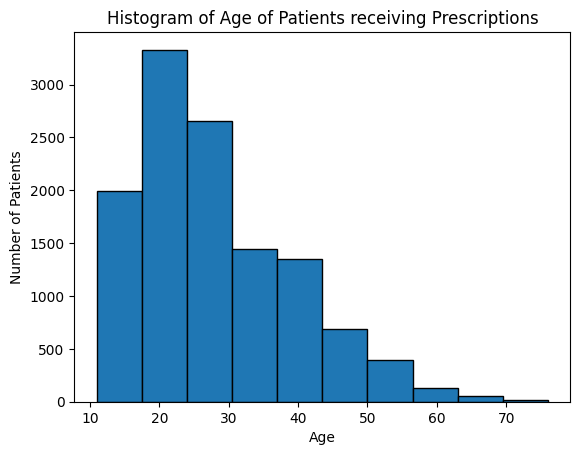

In [56]:
# Create a histogram
plt.hist(age_prescriptions['AGE'], bins=10, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Age of Patients receiving Prescriptions')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

### Age Brackets

In [57]:
# Filter the DataFrame to include only rows where 'Shipped_Order_Count' is not null
filtered_age_prescriptions = age_prescriptions[age_prescriptions['SHIPPED_AT'].notnull()]

# Group by 'Age_Group' and count unique 'PATIENT_ID'
age_bracket_counts = filtered_age_prescriptions.groupby('Age_Group')['PATIENT_ID'].nunique()

# Sort the counts in descending order to find the age brackets with the most unique patient IDs
age_bracket_counts = age_bracket_counts.sort_values(ascending=False)

print(age_bracket_counts)

Age_Group
Young Adult (18-24 years)        1269
Early Adulthood (25-34 years)    1160
Mid Adulthood (35-49 years)       972
Teenager (12-17 years)            722
Late Adulthood (50-64 years)      224
Senior (65+ years)                 13
Late Elementary (9-11 years)        1
Name: PATIENT_ID, dtype: int64


### No of Patients with insurance coverage. Age group of patients vs insurance coverage 

In [58]:
# No of Patients with insurance coverage. Age group of patients vs insurance coverage 
insurance_coverage = age_prescriptions.groupby(['Age_Group', 'INSURANCE_COVERAGE'])['PATIENT_ID'].nunique().reset_index(name='Patient_Count')
print(insurance_coverage)

                        Age_Group INSURANCE_COVERAGE  Patient_Count
0   Early Adulthood (25-34 years)            covered            530
1   Early Adulthood (25-34 years)       no_insurance            605
2   Early Adulthood (25-34 years)         notcovered           1258
3    Late Adulthood (50-64 years)            covered             93
4    Late Adulthood (50-64 years)       no_insurance             94
5    Late Adulthood (50-64 years)         notcovered            236
6    Late Elementary (9-11 years)       no_insurance              1
7    Late Elementary (9-11 years)         notcovered              4
8     Mid Adulthood (35-49 years)            covered            387
9     Mid Adulthood (35-49 years)       no_insurance            418
10    Mid Adulthood (35-49 years)         notcovered            986
11             Senior (65+ years)            covered             14
12             Senior (65+ years)       no_insurance             12
13             Senior (65+ years)         notcov

### Order Count - PDC

In [59]:
# Merge sorted_prescription_count and merged data frames on Patient_ID
prescription_vs_patient_id = pd.merge(sorted_unique_orders_per_prescription, merged_data, on='PATIENT_ID')
prescription_vs_patient_id = prescription_vs_patient_id[["DOCTOR_ID","PATIENT_ID", "PRESCRIPTION_ID" , "Unique_Order_Count", "MPR", "PDC"]]
#print(prescription_vs_patient_id)

# Calculate average MPR and PDC for each prescription count
average_mpr_pdc = prescription_vs_patient_id.groupby('Unique_Order_Count').agg(Average_MPR=('MPR', 'mean'),Average_PDC=('PDC', 'mean')).reset_index()

print(average_mpr_pdc)

   Unique_Order_Count  Average_MPR  Average_PDC
0                   0   110.427413   116.949153
1                   1   153.081552   128.245334
2                   2    84.785824   142.132172
3                   3    98.672003   136.197435
4                   4   108.774709   128.251231
5                   5   117.841611   124.824990
6                   6   113.747089   119.419701
7                   7   111.327472   115.903925


# Create Master File

In [163]:

Doc_with_prescription_order = pd.merge(filtered_prescriptions, doctors, on='DOCTOR_ID', how='left')
patients_data = pd.merge(Doc_with_prescription_order, patients, on='PATIENT_ID', how='left')
overall_data = pd.merge(patients_data, filtered_orders, on='PRESCRIPTION_ID', how='left')
print(overall_data)

                PRESCRIPTION_ID                PATIENT_ID  \
0      6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92ed   
1      664cde23600e7e3f254eebdb  664cde23600e7e3f254eebd6   
2      6655fc2edb2d27ccb657f4ee  664cde23600e7e3f254eebd6   
3      667af276b220091a8df2cf80  667af276b220091a8df2cf7c   
4      65272a2a8fcaa8936d7ec02e  65272a2a8fcaa8936d7ec02a   
...                         ...                       ...   
12045  66352abdeb71f41b0c4e1f29  66352abdeb71f41b0c4e1f25   
12046  66352abdeb71f41b0c4e1f29  66352abdeb71f41b0c4e1f25   
12047  65f87f94a01dfa564a10a949  65f87f93a01dfa564a10a946   
12048  6616a3d327361b387ab08e57  6282cb6e246abcef8feaa014   
12049  66a3f3a3a10b487840111505  66a3f3a2a10b4878401114ff   

                      DOCTOR_ID PRESCRIPTION_WRITTEN_AT  \
0      6614201bb3fe6df48d3e92e8     2024-04-05 16:00:00   
1      5d4c36f60f567e0001349e45     2024-05-21 16:00:00   
2      5d4c36f60f567e0001349e45     2024-05-27 16:00:00   
3      667af276b220091a8df2cf77

In [164]:
# drop rows with missing values in ORDER_ID, INSURANCE_COVERAGE, DAYS_OF_SUPPLY, CREATED_AT
overall_data = overall_data.dropna(subset=['ORDER_ID', 'INSURANCE_COVERAGE', 'DAYS_OF_SUPPLY', 'CREATED_AT'])

print(overall_data.describe())
print(overall_data.isnull().sum())


             PRESCRIPTION_WRITTEN_AT                  DATE_OF_BIRTH  \
count                          12022                          12022   
mean   2024-05-16 01:58:25.884206848  1996-09-11 07:49:15.581434112   
min              2024-01-02 08:00:00            1948-04-13 05:00:00   
25%              2024-04-11 16:00:00            1989-12-07 08:00:00   
50%              2024-05-17 16:00:00            1999-05-28 04:00:00   
75%              2024-06-21 16:00:00            2005-07-22 04:00:00   
max              2024-08-02 16:00:00            2013-10-25 04:00:00   
std                              NaN                            NaN   

                AGE  DAYS_OF_SUPPLY                     CREATED_AT  \
count  12022.000000    12022.000000                          12022   
mean      27.895941       30.134753  2024-05-30 00:25:18.500660736   
min       11.000000       30.000000     2024-01-02 08:47:55.701000   
25%       19.000000       30.000000  2024-04-26 20:48:55.028999936   
50%       

In [165]:
# Save to csv
overall_data.to_csv('overall_data.csv', index=False)

In [63]:
# No of orders shipped by each doctor
shipped_orders_by_doctor = overall_data.groupby('DOCTOR_ID')['SHIPPED_AT'].count().reset_index(name='Shipped_Order_Count')

# Sort the DataFrame by 'Shipped_Order_Count' in descending order
sorted_shipped_orders_by_doctor = shipped_orders_by_doctor.sort_values(by='Shipped_Order_Count', ascending=False)
print(sorted_shipped_orders_by_doctor)


                     DOCTOR_ID  Shipped_Order_Count
788   65f1e8b34c2af3a97bb4afe4                   69
722   65ea3005fa09400137ccc7ba                   69
837   65f85ad8b8e2c65b0aedc1e5                   69
597   654aadeec2ecb6743e5434a6                   62
691   65e8a1704f6e802cba59e35c                   56
...                        ...                  ...
250   5d8d279a31f4d9000111507a                    0
127   5b9c08e0fb435100a9d5033a                    0
1500  66395d22316ffc9ee4b292d9                    0
110   5b4e3165800fa100a90d624d                    0
1588  66438851ab9208778c0bd3cb                    0

[2277 rows x 2 columns]


In [64]:
# No of orders prescribed by each doctor
prescribed_orders_by_doctor = overall_data.groupby('DOCTOR_ID')['PRESCRIPTION_ID'].count().reset_index(name='Prescribed_Order_Count')

# Sort the DataFrame by 'Prescribed_Order_Count' in descending order
sorted_prescribed_orders_by_doctor = prescribed_orders_by_doctor.sort_values(by='Prescribed_Order_Count', ascending=False)
print(sorted_prescribed_orders_by_doctor)


                     DOCTOR_ID  Prescribed_Order_Count
837   65f85ad8b8e2c65b0aedc1e5                     105
722   65ea3005fa09400137ccc7ba                      98
672   65e7412923568e39ce7324a3                      97
788   65f1e8b34c2af3a97bb4afe4                      90
273   5dbb4f5bd2e12a0001a30540                      89
...                        ...                     ...
1447  663298a840196214e486fc1e                       1
1454  663394a6f37c79bcdfdc5a79                       1
1459  6633fdc8e076bc5465f7fc2d                       1
1466  6634fb91d63df15f53cd9a9e                       1
2276  66ad40d33a8f7c2d8a2604bc                       1

[2277 rows x 2 columns]


In [65]:
# Get total unique counts
total_prescriptions = overall_data['PRESCRIPTION_ID'].nunique()
total_created_orders = overall_data['ORDER_ID'].nunique()
total_shipped_orders = overall_data[overall_data['SHIPPED_AT'].notna()]['ORDER_ID'].nunique()

shipped_data = overall_data[overall_data['SHIPPED_AT'].notnull()]
# Group by 'PRESCRIPTION_ID' and count the number of unique 'ORDER_ID'
shipped_order_with_unique_prescription = shipped_data["PRESCRIPTION_ID"].nunique()
print(shipped_order_with_unique_prescription)



# Calculate conversion ratios
ratio_prescriptions_to_created_orders = total_created_orders / total_prescriptions
ratio_prescriptions_to_shipped_orders = total_shipped_orders / total_prescriptions
ratio_created_orders_to_shipped_orders = total_shipped_orders / total_created_orders
ratio_shipped_order_with_unique_prescription = shipped_order_with_unique_prescription / total_prescriptions

# Print results
print(f"Total Prescriptions: {total_prescriptions}")
print(f"Total Created Orders: {total_created_orders}")
print(f"Total Shipped Orders: {total_shipped_orders}")
print(f"Prescription to Created Order Ratio: {ratio_prescriptions_to_created_orders:.2f}")
print(f"Prescription to Shipped Order Ratio: {ratio_prescriptions_to_shipped_orders:.2f}")
print(f"Created Order to Shipped Order Ratio: {ratio_created_orders_to_shipped_orders:.2f}")
print(f"Shipped Order with Unique Prescription Ratio: {ratio_shipped_order_with_unique_prescription:.2f}")


4378
Total Prescriptions: 8750
Total Created Orders: 12022
Total Shipped Orders: 6995
Prescription to Created Order Ratio: 1.37
Prescription to Shipped Order Ratio: 0.80
Created Order to Shipped Order Ratio: 0.58
Shipped Order with Unique Prescription Ratio: 0.50


In [66]:
# Average Time to Ship an Order
# Time difference between Created At and Ordered At
overall_data['Time_to_Ship'] = (overall_data['SHIPPED_AT'] - overall_data['CREATED_AT']).dt.days
print(overall_data['Time_to_Ship'].dropna().mean(   ))

# Average time to ship for each insurance coverage type
coverage_type_avg_time_to_ship = overall_data.groupby('INSURANCE_COVERAGE')['Time_to_Ship'].mean()
print(coverage_type_avg_time_to_ship)


8.30050035739814
INSURANCE_COVERAGE
No_insurance     7.375000
covered          5.867190
notCovered      10.206694
Name: Time_to_Ship, dtype: float64


In [67]:
# Created to Shipping Order Conversion Ratio across states
# Calculate the total number of Shipped Orders / Prescription in each state
Created_to_shipping_ratio = overall_data.groupby('STATE_NAME').agg(
    Total_Shipped_Orders =('SHIPPED_AT', 'count'),
    Total_Created_Orders =('CREATED_AT', 'count')
)
# Top 5 ratios in Decending Order
Created_to_shipping_ratio['Created_to_Shipping_Ratio'] = Created_to_shipping_ratio['Total_Shipped_Orders'] / Created_to_shipping_ratio['Total_Created_Orders']
Created_to_shipping_ratio = Created_to_shipping_ratio.sort_values(by='Created_to_Shipping_Ratio', ascending=False).head()
print(Created_to_shipping_ratio)

                Total_Shipped_Orders  Total_Created_Orders  \
STATE_NAME                                                   
Rhode Island                      15                    20   
South Dakota                      13                    18   
Massachusetts                    209                   307   
Minnesota                         40                    59   
North Carolina                   282                   416   

                Created_to_Shipping_Ratio  
STATE_NAME                                 
Rhode Island                     0.750000  
South Dakota                     0.722222  
Massachusetts                    0.680782  
Minnesota                        0.677966  
North Carolina                   0.677885  


In [68]:
# Calculate Total No of unique Doctors prescribing the drug
unique_doctors = overall_data['DOCTOR_ID'].nunique()
print("Unique Doctors:", unique_doctors)

Unique Doctors: 2277


In [69]:
# Calculate Total No of unique patients prescribing the drug if order shipped is not null
unique_patient = overall_data[overall_data['SHIPPED_AT'].notna()]['PATIENT_ID'].nunique()
print("Unique Patient:", unique_patient)

Unique Patient: 4361


In [70]:
# Calculate Total No of orders shipped
total_shipped_orders = overall_data['SHIPPED_AT'].count()
print("Total Shipped Orders:", total_shipped_orders)


Total Shipped Orders: 6995


### Active Doctors Prescribing our Medicine (Doctor Engagement Rate)

In [71]:
# Get the count of unique prescribing doctors
unique_prescribing_doctors_count = overall_data['DOCTOR_ID'].nunique()

# Get the total count of doctors
total_doctors_count = doctors['DOCTOR_ID'].nunique()

# Calculate the percentage of doctors prescribing medication
percentage_prescribing_doctors = (unique_prescribing_doctors_count / total_doctors_count) * 100

# Print the results
print(f"Number of doctors prescribing medication: {unique_prescribing_doctors_count}")
print(f"Total number of doctors: {total_doctors_count}")
print(f"Percentage of doctors prescribing medication: {percentage_prescribing_doctors:.2f}%")

Number of doctors prescribing medication: 2277
Total number of doctors: 2340
Percentage of doctors prescribing medication: 97.31%


Unique_Order_Count
1    6486
2    1578
3     456
4     154
5      63
6      10
7       3
Name: count, dtype: int64


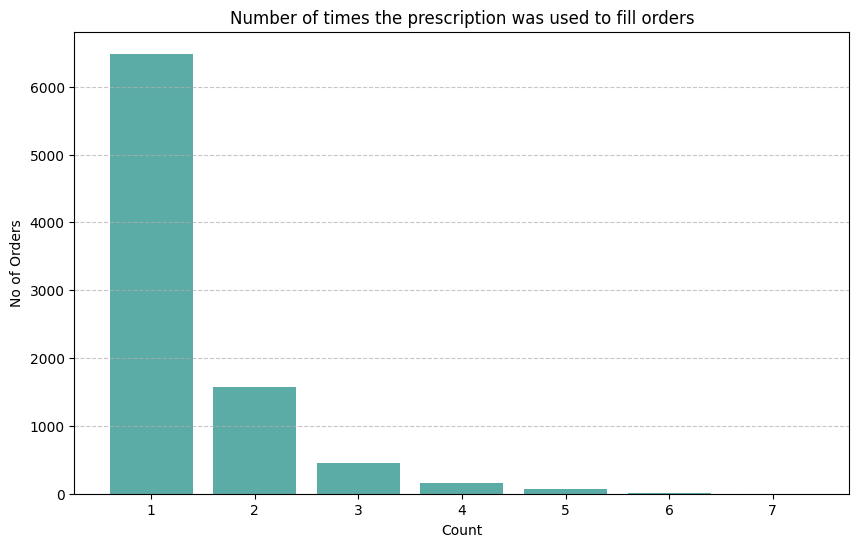

In [72]:
#Redo from Above: 
# Group by 'PRESCRIPTION_ID' and count the number of unique 'ORDER_ID'
unique_orders_per_prescription = overall_data.groupby(['DOCTOR_ID', 'PATIENT_ID','PRESCRIPTION_ID'])['ORDER_ID'].nunique().reset_index(name='Unique_Order_Count')

# Sort the DataFrame by 'Unique_Order_Count' in descending order
sorted_unique_orders_per_prescription = unique_orders_per_prescription.sort_values(by='Unique_Order_Count', ascending=False)

#print(sorted_unique_orders_per_prescription)

# Get the distribution of Unique_Order_Count
distribution= sorted_unique_orders_per_prescription['Unique_Order_Count'].value_counts().sort_index()
print(distribution)

import matplotlib.pyplot as plt

# Assuming 'distribution' is the Series with value counts
# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='#5BAbA6')  # Bars colored in sky blue (#87CEEB)
plt.xlabel('Count')
plt.ylabel('No of Orders')
plt.title('Number of times the prescription was used to fill orders')
plt.xticks(distribution.index)  # Show all unique order count values on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [73]:
# Number of Prescriptions per state
unique_prescriptions_per_state = overall_data.groupby('STATE_NAME')['PRESCRIPTION_ID'].count().reset_index(name='Unique_Prescription_Count')
# Print in Descending Order
unique_prescriptions_per_state = unique_prescriptions_per_state.sort_values(by='Unique_Prescription_Count', ascending=False)
print(unique_prescriptions_per_state)

              STATE_NAME  Unique_Prescription_Count
42                 Texas                       1526
9                Florida                       1235
4             California                        862
31              New York                        853
29            New Jersey                        640
34                  Ohio                        640
13              Illinois                        530
10               Georgia                        445
32        North Carolina                        416
2                Arizona                        312
20         Massachusetts                        307
21              Michigan                        293
37          Pennsylvania                        291
35              Oklahoma                        271
39        South Carolina                        257
44              Virginia                        245
19              Maryland                        238
0                Alabama                        211
24          

In [78]:
df = overall_data.copy()

import pandas as pd
from datetime import timedelta

def calculate_refill_rate(df):
    # Sort the dataframe by PATIENT_ID and CREATED_AT
    df = df.sort_values(['PATIENT_ID','PRESCRIPTION_WRITTEN_AT', 'CREATED_AT'])
    
    # Group by PATIENT_ID
    grouped = df.groupby(['PATIENT_ID','PRESCRIPTION_ID'])
    
    total_patients = df['ORDER_ID'].count()
    #print(total_patients)
    patients_with_refills = set()
    patients_without_refills = set()
    refills_for_patient = 0
    
    for patient_id, patient_df in grouped:
        # Ensure the dataframe is sorted by CREATED_AT
        patient_df = patient_df.sort_values('CREATED_AT')
        
        if len(patient_df) > 1:
            for i in range(len(patient_df) - 1):
                current_rx = patient_df.iloc[i]
                next_rx = patient_df.iloc[i + 1]
                
                if i == 0:
                    # Calculate the expected refill date based on PRESCRIPTION_WRITTEN_AT
                    expected_refill_date = current_rx['PRESCRIPTION_WRITTEN_AT'] + timedelta(days=current_rx['DAYS_OF_SUPPLY'])
                else:
                    # Calculate the expected refill date based on SHIPPED_AT
                    expected_refill_date = current_rx['SHIPPED_AT'] + timedelta(days=current_rx['DAYS_OF_SUPPLY'])
                
                # Check if the next prescription's CREATED_AT is within 7 days of the expected refill date
                if 0 <= (next_rx['CREATED_AT'] - expected_refill_date).days <= 7:
                    refills_for_patient += 1
                    # Update the expected_refill_date to the new prescription's date
                    expected_refill_date = next_rx['SHIPPED_AT'] + timedelta(days=next_rx['DAYS_OF_SUPPLY'])
        
        # Count the patient if they had at least one valid refill
        if refills_for_patient > 0:
            patients_with_refills.add(patient_id)
        else:
            patients_without_refills.add(patient_id)
        
    refill_rate = (len(patients_with_refills) / total_patients) * 100
    # Extract data for patients without refills
    patients_without_refills_df = df[df['PATIENT_ID'].isin(patients_without_refills)]
    #patients_with_refills_df = df[df['PATIENT_ID'].isin(patients_with_refills)]
    
    # Analyze age group and insurance coverage for patients without refills
    age_group_distribution = patients_without_refills_df['Age_Group'].value_counts()
    insurance_coverage_distribution = patients_without_refills_df['INSURANCE_COVERAGE'].value_counts()

    #age_group_distribution = patients_with_refills_df['Age_Group'].value_counts()
    #insurance_coverage_distribution = patients_with_refills_df['INSURANCE_COVERAGE'].value_counts()

    return refill_rate, age_group_distribution, insurance_coverage_distribution

# Calculate refill rate and distributions
refill_rate, age_group_distribution, insurance_coverage_distribution = calculate_refill_rate(df)

print(f"The refill rate is: {refill_rate:.2f}%")
print("\nAge Group Distribution for Patients Without Refills:")
print(age_group_distribution)
print("\nInsurance Coverage Distribution for Patients Without Refills:")
print(insurance_coverage_distribution)

The refill rate is: 72.75%

Age Group Distribution for Patients Without Refills:
Series([], Name: count, dtype: int64)

Insurance Coverage Distribution for Patients Without Refills:
Series([], Name: count, dtype: int64)


In [114]:
df = overall_data.copy()

# Convert time columns to datetime if necessary
df['CREATED_AT'] = pd.to_datetime(df['CREATED_AT'], format='%H:%M.%S', errors='coerce')
df['SHIPPED_AT'] = pd.to_datetime(df['SHIPPED_AT'], format='%H:%M.%S', errors='coerce')

# Sort data to ensure chronological order
df = df.sort_values(['PATIENT_ID', 'PRESCRIPTION_ID', 'SHIPPED_AT'])

# Identify fills and refills
df['Is_Fill'] = df.groupby(['PATIENT_ID', 'PRESCRIPTION_ID']).cumcount() == 0
df['Number_of_Fills'] = df.groupby(['PATIENT_ID', 'PRESCRIPTION_ID'])['Is_Fill'].transform('sum')
df['Number_of_Refills'] = df['Number_of_Fills'] - 1  # Total fills - 1 is the number of refills

# Aggregate results
result = df.groupby(['PATIENT_ID', 'PRESCRIPTION_ID']).agg({
    'Number_of_Fills': 'max',
    'Number_of_Refills': 'max'
}).reset_index()

# Calculate and print sums
total_fills = result['Number_of_Fills'].sum()
total_refills = result['Number_of_Refills'].sum()  # Sum of refills, not the count of records

# Calculate distribution of the number of refills
refill_distribution = result['Number_of_Refills'].value_counts().sort_index()

print(result)
print(f"Total Number of Fills: {total_fills}")
print(f"Total Number of Refills: {total_refills}")

# Aggregate results by doctor
doctor_refills = df.groupby(['DOCTOR_ID','PATIENT_ID', 'PRESCRIPTION_ID']).agg({
    'Number_of_Refills': 'sum',
    'PATIENT_ID': 'count'  # count prescriptions or orders
}).rename(columns={'PATIENT_ID': 'Number_of_Prescriptions'}).reset_index()

print(result["Number_of_Fills"].nunique())

                    PATIENT_ID           PRESCRIPTION_ID  Number_of_Fills  \
0     5a83288837fb1000a85ab4fe  663d696d5dccd955f026d2dd                1   
1     5ae35f264a029500a811ae92  6699605c8e800f17b44bad96                1   
2     5b201e05ec7f5b00a93f2372  662be5a628b0f209c874e389                1   
3     5b6afc45f4135f00b78e3aa0  65fe0a59cbeb659f0395f4cd                1   
4     5bce01cd0bd67300a91debc5  667b06c3b220091a8df32fd0                1   
...                        ...                       ...              ...   
8745  66ac182e9c098317c694234f  66ac182e9c098317c6942354                1   
8746  66ac1a8f9c098317c6942908  66ac1a8f9c098317c694290d                1   
8747  66ac1bb4ea51f591c50015eb  66ac1bb4ea51f591c50015ef                1   
8748  66ac1f499c098317c69430ac  66ac1f4a9c098317c69430b1                1   
8749  66ac21939c098317c6943374  66ac21949c098317c694337b                1   

      Number_of_Refills  
0                     0  
1                     0